Лабораторная работа № 7  Классификация (Байесовские методы, деревья)

Выполнил: Мартынов В.А., ДПИ15

1. Загрузка данных:

In [176]:
# Модуль импорта

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [177]:
# Загрузка данных
# Согласно описанию датасета, метками данных является столбец "Class".

column_names = [
    'Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash',
    'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
    'Proanthocyanins', 'Color_Intensity', 'Hue',
    'OD280_OD315', 'Proline'
]

data = pd.read_csv('wine.data', header=None, names=column_names)

data

,Class,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [178]:
# Создадим новые переменные, labels будет содержать столбец с метками данных, Х будет содержать сами данные.
# Использование LabelEncoder не требуется для кодирования меток, так как они уже находятся в числовом представлении.

labels = data['Class']
print(labels)

X = data.drop(['Class'], axis=1)
X

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64


,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [179]:
# Разделение данных на две выборки 50/50

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.5, random_state=10)

2. Байесовские методы

In [180]:
# Создание модели наивного байесовского классификатора
model = GaussianNB()

# Обучение модели на обучающей выборке
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Общее количество точек
total_points = len(y_test)

# Количество неправильно классифицированных точек
incorrect_points = (y_test != y_pred).sum()

# Вычисление точности классификации
accuracy = model.score(X_test, y_test)

# Вывод результатов
print(f'Общее количество точек: {total_points}')
print(f'Количество неправильно классифицированных точек: {incorrect_points}')
print(f'Точность классификации: {accuracy:.2f}')

Общее количество точек: 89
Количество неправильно классифицированных точек: 8
Точность классификации: 0.91


In [181]:
# Класс GaussianNB из библиотеки scikit-learn представляет собой наивный байесовский классификатор, основанный на предположении о нормальном распределении признаков. 
# 
# Атрибуты класса GaussianNB
#       priors:
#           Описание: Это массив, содержащий априорные вероятности классов. Если не указано, используются равные вероятности для всех классов.
#           Влияние: Позволяет задать предпочтения для классов, что может быть полезно в случае несбалансированных данных.
#       var_smoothing:
#           Описание: Это параметр, который добавляет небольшое значение к дисперсии каждого признака для предотвращения деления на ноль и улучшения численной стабильности.
#           Влияние: Увеличение этого значения может помочь в случаях, когда дисперсия признаков очень мала, что может привести к проблемам при вычислении вероятностей

In [182]:
# Определение уникальных классов
unique_classes = labels.unique()
num_classes = len(unique_classes)
print('Число уникальных классов для определения вероятностей -',num_classes)

# Задание априорных вероятностей для классов
priors = [0.8, 0.1, 0.1]  # Сумма вероятностей должна составлять 1, или 100%

# Создание модели наивного байесовского классификатора с заданными параметрами
model_example = GaussianNB(priors=priors, var_smoothing=1e-9)

# Обучение модели на обучающей выборке
model_example.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model_example.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)

# Вывод точности
print(f'Точность классификации: {accuracy:.2f}')


Число уникальных классов для определения вероятностей - 3
Точность классификации: 0.91


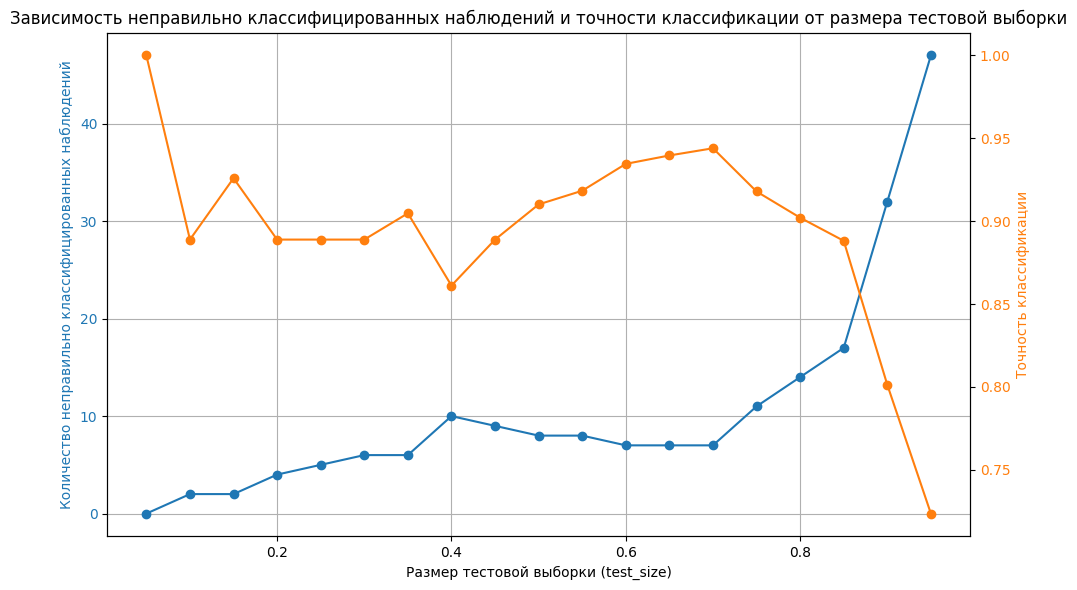

In [183]:

# Списки для хранения результатов
test_sizes = np.arange(0.05, 1.0, 0.05)
incorrect_counts = []
accuracies = []

# Цикл по различным размерам тестовой выборки
for test_size in test_sizes:
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=test_size, random_state=10)
    
    # Создание и обучение модели
    model = GaussianNB()
    model.fit(X_train, y_train)
    
    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)
    
    # Подсчет неправильно классифицированных наблюдений
    incorrect_count = (y_test != y_pred).sum()
    incorrect_counts.append(incorrect_count)
    
    # Вычисление точности классификации
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Построение графика с двумя осями Y
fig, ax1 = plt.subplots(figsize=(10, 6))

# График 1: Неправильно классифицированные наблюдения
color = 'tab:blue'
ax1.set_xlabel('Размер тестовой выборки (test_size)')
ax1.set_ylabel('Количество неправильно классифицированных наблюдений', color=color)
ax1.plot(test_sizes, incorrect_counts, marker='o', color=color, label='Неправильно классифицированные')
ax1.tick_params(axis='y', labelcolor=color)

# Создание второй оси Y
ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('Точность классификации', color=color)  
ax2.plot(test_sizes, accuracies, marker='o', color=color, label='Точность классификации')
ax2.tick_params(axis='y', labelcolor=color)

# Добавление заголовка и сетки
plt.title('Зависимость неправильно классифицированных наблюдений и точности классификации от размера тестовой выборки')
ax1.grid()

# Показать график
fig.tight_layout()  
plt.show()


In [184]:
# На полученном графике видим две кривых, синяя показывает количество неправильно классифицированных наблюдений, оранжевая общую точность классификации. 
# При размере тестовой выборки до 40% наблюдаются нестабильные результаты классификации, это говорит о переобученности модели, так как обучающих данных в этом случае слишком много.
# Начиная с 40% и заканчивая 70% модель показала более надежный результат, можно пронаблюдать, как количество неправильных классификаций начало незначительно уменьшаться, но точность начала возрастать значительно.
# От 70% наблюдаем резкую смену тенденции графика, тестовая выборка в этом случае слишком велика, что приводит к недообученности модели, что хорошо наблюдается в обратно пропорциональных изменениях двух параметров.

In [185]:
# Подготовим базовый код для вывода графиков для остальных методов. Данных ход используется, чтобы в дальнейшем можно было удобно прокомментировать каждый график.

# Функция инициализации модели и расчета тестовой выборки
def evaluate_model(model, X, y, test_sizes):
    incorrect_counts = []
    accuracies = []

    for test_size in test_sizes:
        # Разделение данных на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)
        
        # Обучение модели
        model.fit(X_train, y_train)
        
        # Предсказание на тестовой выборке
        y_pred = model.predict(X_test)
        
        # Подсчет неправильно классифицированных наблюдений
        incorrect_count = (y_test != y_pred).sum()
        incorrect_counts.append(incorrect_count)
        
        # Вычисление точности классификации
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    return incorrect_counts, accuracies

# Функция для построения графиков
def plot_results(model, incorrect_counts, accuracies):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # График 1: Неправильно классифицированные наблюдения
    color = 'tab:blue'
    ax1.set_xlabel('Размер тестовой выборки (test_size)')
    ax1.set_ylabel('Количество неправильно классифицированных наблюдений', color=color)
    ax1.plot(test_sizes, incorrect_counts, marker='o', color=color, label='Неправильно классифицированные')
    ax1.tick_params(axis='y', labelcolor=color)

    # Создание второй оси Y
    ax2 = ax1.twinx()  
    color = 'tab:orange'
    ax2.set_ylabel('Точность классификации', color=color)  
    ax2.plot(test_sizes, accuracies, marker='o', color=color, label='Точность классификации')
    ax2.tick_params(axis='y', labelcolor=color)

    # Добавление заголовка и сетки
    plt.title(f'Зависимость неправильно классифицированных наблюдений и точности классификации от размера тестовой выборки ({model})')
    ax1.grid()

    # Показать график
    fig.tight_layout()  
    plt.show()



In [186]:
#Задаем размеры тестовой выборки
test_sizes = np.arange(0.05, 1.0, 0.05)

# Инициализация моделей
models = {
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB()
}

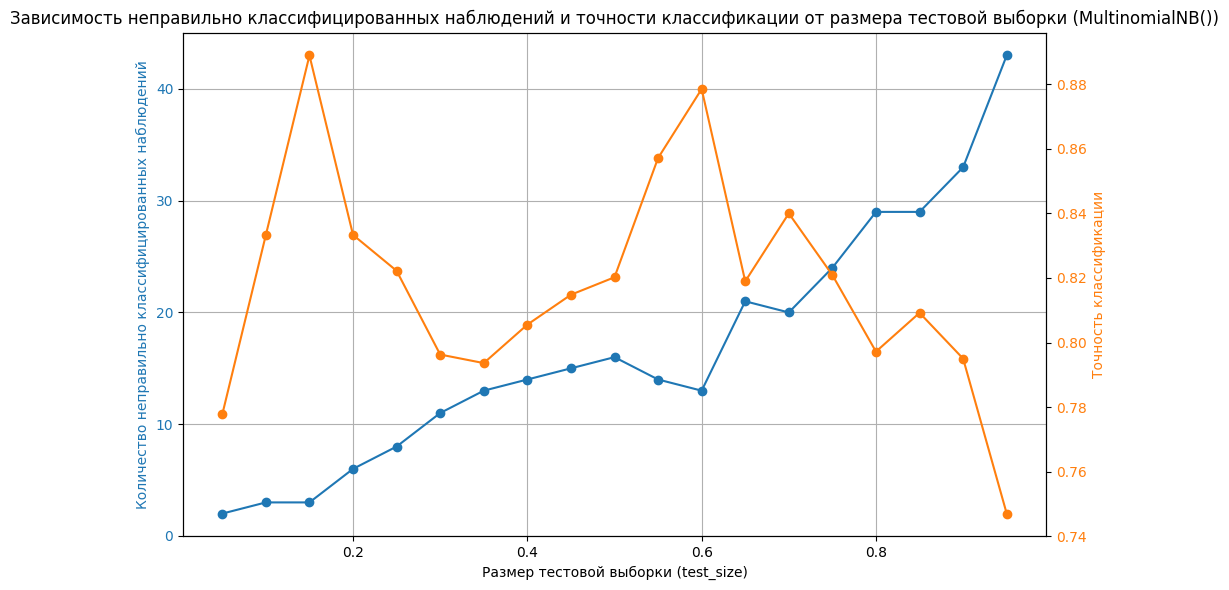

In [187]:
# Запуск классификации MultinomialNB

model_name = "MultinomialNB"
model = models[model_name]

incorrect_counts, accuracies = evaluate_model(model, X, labels, test_sizes)
plot_results(model, incorrect_counts, accuracies)

In [188]:
# На полученном графике видим две кривых, синяя показывает количество неправильно классифицированных наблюдений, оранжевая общую точность классификации. 
# Модель показала себя хуже GaussianNB, наблюдается серьезная нестабильность показателей.
# При размере тестовой выборки до 30% наблюдаются высокая точность и низкое количество неправильных классификаций, что естественно при высоком количестве обучающих данных.
# Рабочим диапазоном модели можно считать интервал от 30 до 60%. При 60% модель показала хороший результат, но не лучше GaussianNB.
# От 60% наблюдаем рост количества неправильных классификаций, небольшую нестабильность, а далее устойчивую тенденцию в обратной пропорциональности графиков, которая говорит о недостаточном обучении модели.

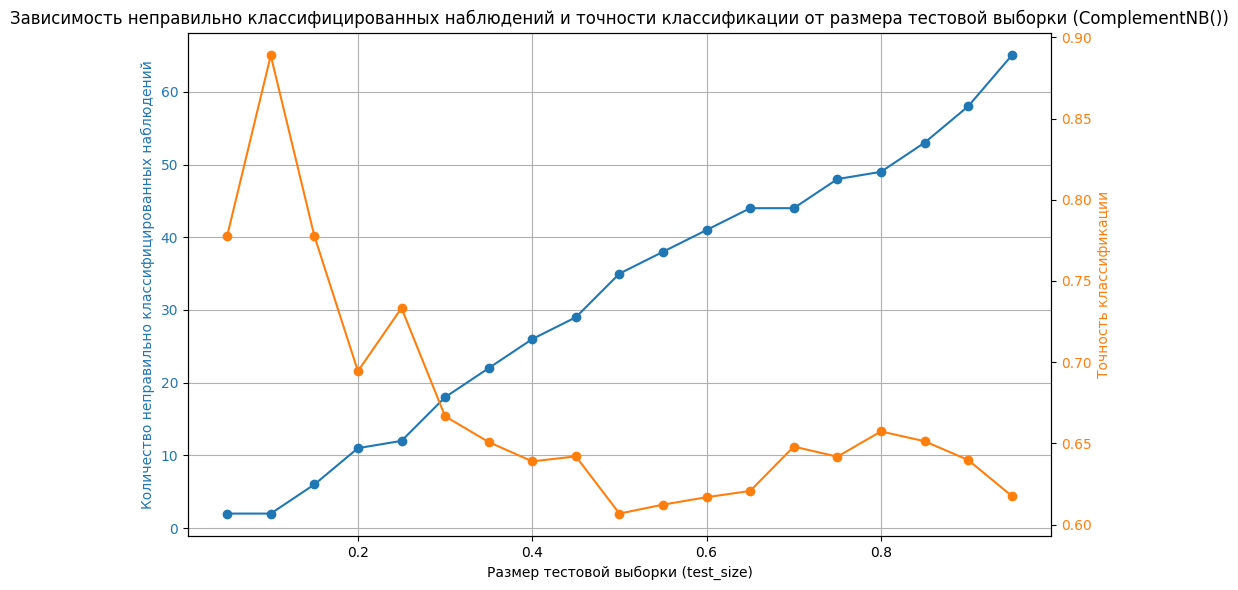

In [189]:
# Запуск классификации ComplementNB

model_name = "ComplementNB"
model = models[model_name]

incorrect_counts, accuracies = evaluate_model(model, X, labels, test_sizes)
plot_results(model, incorrect_counts, accuracies)

In [190]:
# На полученном графике видим две кривых, синяя показывает количество неправильно классифицированных наблюдений, оранжевая общую точность классификации. 
# Модель показала себя хуже GaussianNB и MultinomialNB. На всём диапазоне размера тестовой выборки количество неправильных классификаций стабильно возрастает.
# В свою очередь, точность классификации ведёт себя достаточно нестабильно в случае малого количества тестовой выборки.
# От 30% тестовой выборки наблюдается фиксация показателя точности в диапазоне 60-68%.

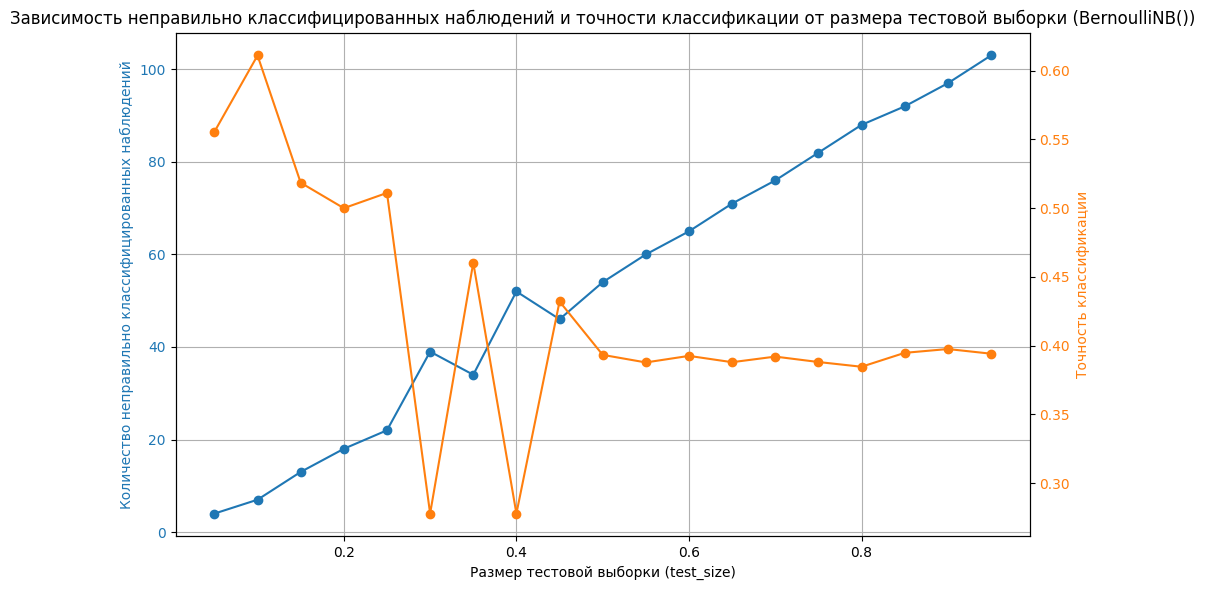

In [191]:
# Запуск классификации BernoulliNB

model_name = "BernoulliNB"
model = models[model_name]

incorrect_counts, accuracies = evaluate_model(model, X, labels, test_sizes)
plot_results(model, incorrect_counts, accuracies)

In [192]:
# На полученном графике видим две кривых, синяя показывает количество неправильно классифицированных наблюдений, оранжевая общую точность классификации. 
# Модель повела себя схожим образом с ComplementNB, но показала гораздо более худшие результаты. На всём диапазоне размера тестовой выборки количество неправильных классификаций стабильно возрастает.
# В данном случае показатель точности даже для переобученной модели не превышает среднего показателя хорошо обученной модели ComplementNB.
# Важно отметить, что при тестовой выборке 50% и более наблюдается достаточно стабильный показатель точности. Данный факт говорит о том, что несмотря на небольшое количество правильных определений, даже слабообученная модель продолжает выделять и истинные-истинные классы.

3. Классифицирующие деревья

Точность: 0.87
Количество листьев: 5
Глубина дерева: 3


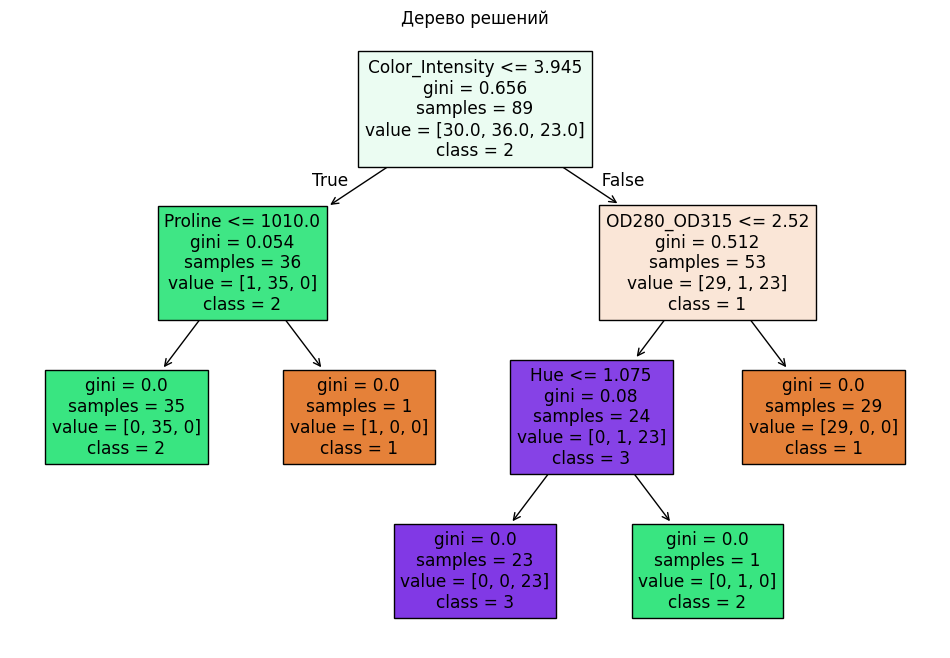

In [193]:
class_names = ['1', '2', '3']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.5, random_state=10)

# Создание и обучение модели дерева решений
clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train, y_train)

# Вычисление точности классификации
accuracy = clf.score(X_test, y_test)
print(f'Точность: {accuracy:.2f}')

# Получение характеристик дерева
n_leaves = clf.get_n_leaves()
depth = clf.get_depth()
print(f'Количество листьев: {n_leaves}')
print(f'Глубина дерева: {depth}')

# Визуализация дерева
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names)
plt.title('Дерево решений')
plt.show()


In [194]:
# Основные данные на которые следует опираться при анализе деревьев решений:
#       gini - Индекс Джини - измеряет вероятность того, что два случайно выбранных элемента из набора данных будут принадлежать к разным классам. Чем ниже значение индекса Джини, тем более "чистым" является узел (т.е. узел содержит элементы одного класса).
#           В данном случае, когда данный показатель становится равен нулю, ветвление заканчивается и алгоритм заканчивает классификацию.
#       samples - Количество поступивших экземпляров на вход шага классификации. При последующих итерациях алгоритма видно, как ближе к листьям количество экземпляров становится меньше.
#       value - Показывает количество экземпляров в виде списка. По данному параметру мы можем оценить количество экземпляров классов полученное в ходе итерации. Также по этому показателю заметно, как алгоритм "разбивает" экземпляры по разным листьям
#       class - значение, показывающее доминирующий класс по результатам итерации, оценивает количество экземпляров классов.
#       Цвет блока в этом случае соответствует номеру класса, что облегчает визуальное восприятие дерева.

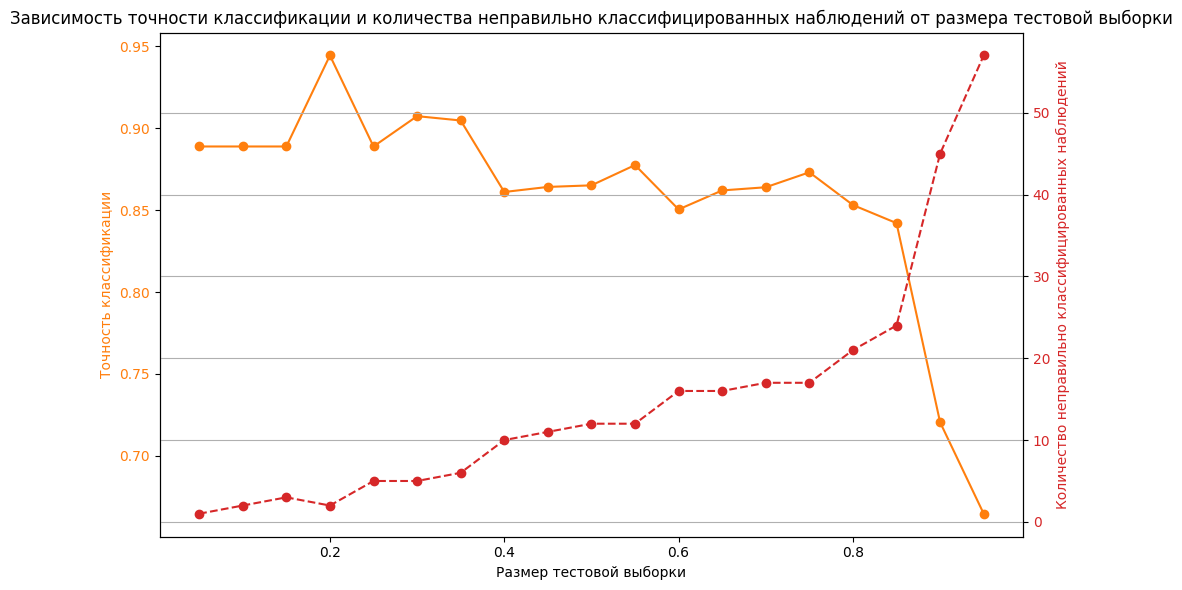

In [195]:

# Списки для хранения результатов
test_sizes = np.arange(0.05, 1.0, 0.05)
accuracies = []
misclassified_counts = []

# Цикл по различным размерам тестовой выборки
for test_size in test_sizes:
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=test_size, random_state=10)
    
    # Создание и обучение модели дерева решений
    clf = DecisionTreeClassifier(random_state=10)
    clf.fit(X_train, y_train)
    
    # Вычисление точности классификации
    accuracy = clf.score(X_test, y_test)
    accuracies.append(accuracy)
    
    # Вычисление количества неправильно классифицированных наблюдений
    y_pred = clf.predict(X_test)
    misclassified_count = np.sum(y_pred != y_test)
    misclassified_counts.append(misclassified_count)

# Построение графика с двумя y-оси
fig, ax1 = plt.subplots(figsize=(10, 6))

# График 1: Точность классификации
color = 'tab:orange'
ax1.set_xlabel('Размер тестовой выборки')
ax1.set_ylabel('Точность классификации', color=color)
ax1.plot(test_sizes, accuracies, marker='o', color=color, label='Точность классификации')
ax1.tick_params(axis='y', labelcolor=color)

# Создание второго y-оси
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Количество неправильно классифицированных наблюдений', color=color)
ax2.plot(test_sizes, misclassified_counts, marker='o', color=color, label='Неправильно классифицированные', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Заголовок и сетка
plt.title('Зависимость точности классификации и количества неправильно классифицированных наблюдений от размера тестовой выборки')
fig.tight_layout()  # Чтобы избежать наложения
plt.grid()
plt.show()

In [196]:
# На полученном графике видим две кривых, красная показывает количество неправильно классифицированных наблюдений, оранжевая общую точность классификации. 
# Модель показывает достаточно уверенные результаты на всём диапазоне размера тестовой выборки.
# Модель можно считать рабочей в диапазоне размера тестовой выборки 40-75%. На отрезке модель показывает достаточно стабильную точность более 85%, и неправильную классификацию в диапазоне 10-18%.
# При размере тестовой выборки более 85% модель недостаточно обучилась, что видно по графику.

In [197]:
# Параметры для перебора
test_sizes = np.arange(0.3, 0.71, 0.05)
criteria = ['gini', 'entropy', 'log_loss']
splitters = ['best', 'random']
max_depths = range(2, 6)  # от 2 до 5
min_samples_splits = range(10, 81, 10)  # от 10 до 80 с шагом 10
min_samples_leaves = range(10, 81, 10)  # от 10 до 80 с шагом 10

# Словарь для хранения результатов
results = {}

# Цикл по всем параметрам
for criterion in criteria:
    for splitter in splitters:
        for max_depth in max_depths:
            for min_samples_split in min_samples_splits:
                for min_samples_leaf in min_samples_leaves:
                    accuracies = []
                    misclassified_counts = []
                    
                    # Цикл по различным размерам тестовой выборки
                    for test_size in test_sizes:
                        # Разделение данных на обучающую и тестовую выборки
                        X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=test_size, random_state=10)
                        
                        # Создание и обучение модели дерева решений
                        clf = DecisionTreeClassifier(
                            criterion=criterion,
                            splitter=splitter,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            random_state=10
                        )
                        clf.fit(X_train, y_train)
                        
                        # Вычисление точности классификации
                        accuracy = clf.score(X_test, y_test)
                        accuracies.append(accuracy)
                        
                        # Вычисление количества неправильно классифицированных наблюдений
                        y_pred = clf.predict(X_test)
                        misclassified_count = np.sum(y_pred != y_test)
                        misclassified_counts.append(misclassified_count)

                    # Сохранение результатов
                    results[(criterion, splitter, max_depth, min_samples_split, min_samples_leaf)] = {
                        'accuracies': accuracies,
                        'misclassified_counts': misclassified_counts,
                        'mean_accuracy': np.mean(accuracies),
                        'mean_misclassified': np.mean(misclassified_counts)
                    }

# Определение лучшей комбинации параметров
best_params = None
best_mean_accuracy = -np.inf
best_mean_misclassified = np.inf

for params, metrics in results.items():
    mean_accuracy = metrics['mean_accuracy']
    mean_misclassified = metrics['mean_misclassified']
    
    # Условие для выбора лучшей комбинации
    if mean_accuracy > best_mean_accuracy and mean_misclassified < best_mean_misclassified:
        best_mean_accuracy = mean_accuracy
        best_mean_misclassified = mean_misclassified
        best_params = params

# Вывод лучшей комбинации параметров
print("Лучшая комбинация параметров:")
print(f"Criterion: {best_params[0]}")
print(f"Splitter: {best_params[1]}")
print(f"Max Depth: {best_params[2]}")
print(f"Min Samples Split: {best_params[3]}")
print(f"Min Samples Leaf: {best_params[4]}")
print(f"Средняя точность: {best_mean_accuracy:.4f}")
print(f"Среднее количество неправильно классифицированных наблюдений: {best_mean_misclassified:.4f}")


Лучшая комбинация параметров:
Criterion: entropy
Splitter: best
Max Depth: 2
Min Samples Split: 10
Min Samples Leaf: 10
Средняя точность: 0.8397
Среднее количество неправильно классифицированных наблюдений: 13.8889


In [198]:
# Для упрощения кода и облегчения нагрузки на вычислительные мощности было принято решение попытаться определить перечень оптимальных параметров классификации по двум метрикам - средняя точность и среднее количество неправильных классификаций на участке от 30 до 70%.
# Данный диапазон соответствует показателям обученной модели для большинства случаев, которые рассматривались выше.

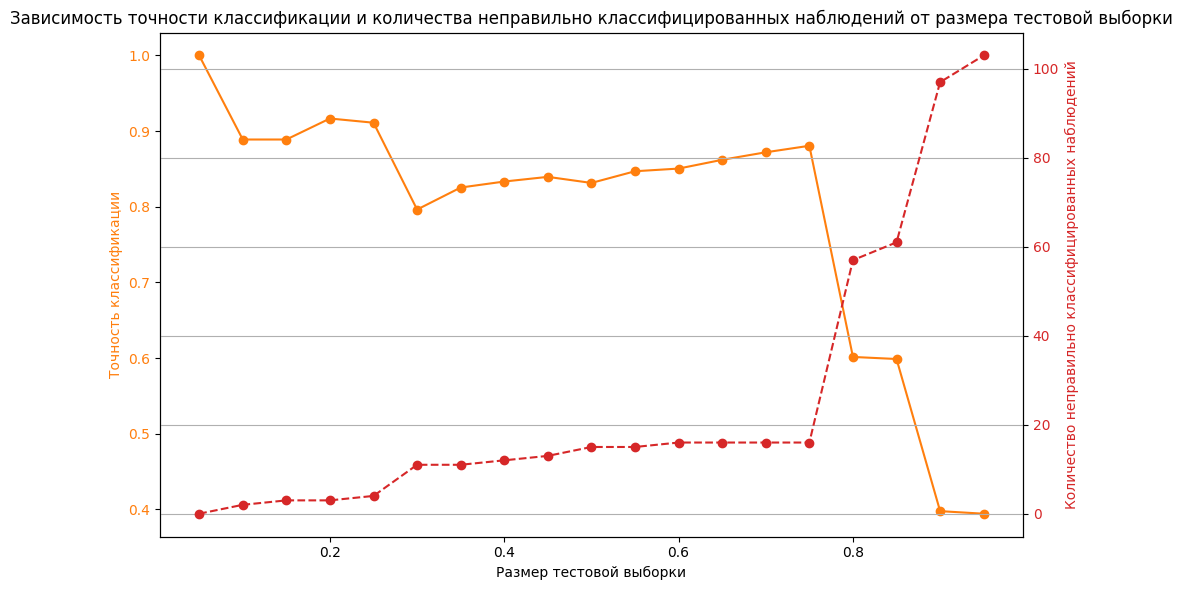

In [199]:
# Списки для хранения результатов
test_sizes = np.arange(0.05, 1.0, 0.05)
accuracies = []
misclassified_counts = []

# Цикл по различным размерам тестовой выборки
for test_size in test_sizes:
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=test_size, random_state=10)
    
    # Создание и обучение модели дерева решений
    clf = DecisionTreeClassifier(
        criterion=best_params[0],
        splitter=best_params[1],
        max_depth=best_params[2],
        min_samples_split=best_params[3],
        min_samples_leaf=best_params[4],
        random_state=10)
    clf.fit(X_train, y_train)
    
    # Вычисление точности классификации
    accuracy = clf.score(X_test, y_test)
    accuracies.append(accuracy)
    
    # Вычисление количества неправильно классифицированных наблюдений
    y_pred = clf.predict(X_test)
    misclassified_count = np.sum(y_pred != y_test)
    misclassified_counts.append(misclassified_count)

# Построение графика с двумя y-оси
fig, ax1 = plt.subplots(figsize=(10, 6))

# График 1: Точность классификации
color = 'tab:orange'
ax1.set_xlabel('Размер тестовой выборки')
ax1.set_ylabel('Точность классификации', color=color)
ax1.plot(test_sizes, accuracies, marker='o', color=color, label='Точность классификации')
ax1.tick_params(axis='y', labelcolor=color)

# Создание второго y-оси
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Количество неправильно классифицированных наблюдений', color=color)
ax2.plot(test_sizes, misclassified_counts, marker='o', color=color, label='Неправильно классифицированные', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Заголовок и сетка
plt.title('Зависимость точности классификации и количества неправильно классифицированных наблюдений от размера тестовой выборки')
fig.tight_layout()  # Чтобы избежать наложения
plt.grid()
plt.show()

In [200]:
# После определения лучших параметров, выводим визуализацию зависимости точности классификации и количества неправильно классифицироанных наблюдений от размера тестовой выборки.
# На полученном графике видим две кривых, красная показывает количество неправильно классифицированных наблюдений, оранжевая общую точность классификации. 
# В интервале диапазона тестовой выборки до 30% наблюдаем переобученную модель.
# В интервале от 30% до 75% модель показала отличные результаты, незначительные изменения показателей, что указывают на хорошую устойчивость модели.
# В интервале более 75% наблюдаем недостаточное обучение модели.